In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm

In [2]:
df=pd.read_csv("Loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

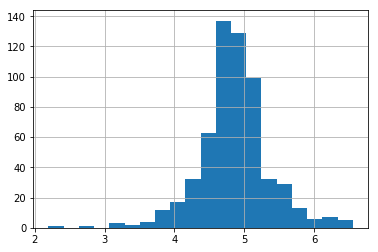

In [7]:
# histogram
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)

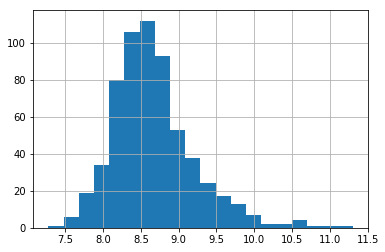

In [8]:
df["total_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["total_income_log"]=np.log(df["total_income"])
df["total_income_log"].hist(bins=20)

Fill null values in each coloumn by its mean and mode value

In [9]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [10]:
df["Gender"].isna().sum()

0

In [11]:
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [12]:
df["LoanAmount"].fillna(np.mean(df["LoanAmount"]),inplace=True)
df["LoanAmount_log"].fillna(np.mean(df["LoanAmount_log"]),inplace=True)

In [13]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [14]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [15]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


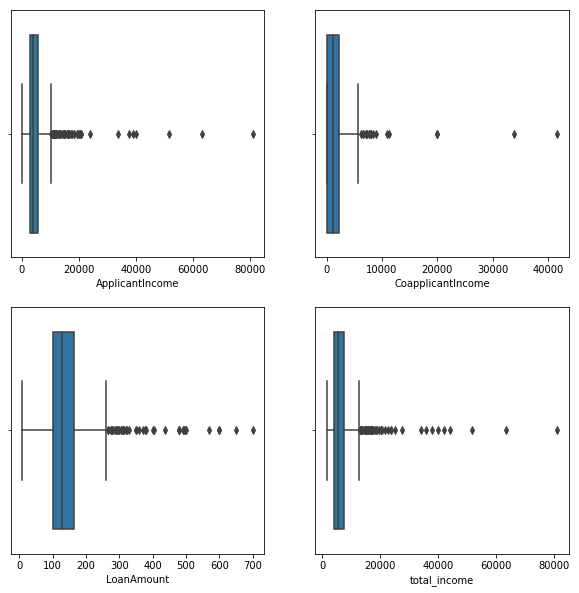

In [17]:
# outlier detection
plt.figure(figsize=(10,10))
li=["ApplicantIncome","CoapplicantIncome","LoanAmount","total_income"]
j=1
for i in li:
    plt.subplot(2,2,j)
    sns.boxplot(x=df[i])
    j=j+1

In [18]:
# outliers found 
# defining a function to clean the outliers
def out_liers_removing(df,col):
    q1=np.percentile(df[col],25,interpolation="midpoint")
    q3=np.percentile(df[col],75,interpolation="midpoint")
    iqr=q3-q1
    print("iqr=",col,q1)
    low_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    df_out=df.loc[(df[col]>low_limit)&(df[col]<upper_limit)]
    return df_out


In [19]:
df.shape

(614, 16)

In [20]:
df1=df
for c in li:
    df2=out_liers_removing(df1,c)
    df1=df2
    

iqr= ApplicantIncome 2879.0
iqr= CoapplicantIncome 0.0
iqr= LoanAmount 100.0
iqr= total_income 3887.5


In [21]:
df1.shape
# out liers are removed

(501, 16)

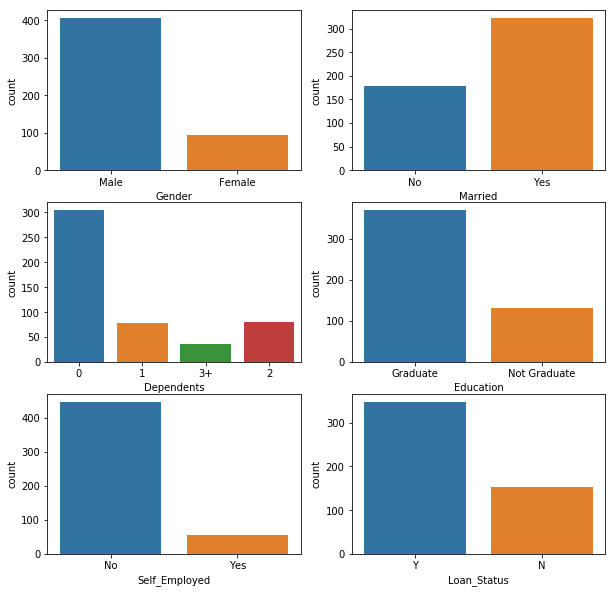

In [22]:
col_list=["Gender","Married","Dependents","Education","Self_Employed","Loan_Status"]
j=1
plt.figure(figsize=(10,10))
for i in col_list:
    plt.subplot(3,2,j)
    sns.countplot(x=df1[i])
    j+=1

In [23]:
df1.Dependents.unique()

array(['0', '1', '3+', '2'], dtype=object)

In [24]:
df3=df1

In [25]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
col_list=["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for i in col_list:
    df3[i]=l.fit_transform(df3[i])
    

In [26]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,total_income,total_income_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.857444,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [27]:
df3.drop(["LoanAmount_log","total_income","total_income_log"],inplace=True,axis=1)

In [28]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [29]:
df3.drop("Loan_ID",axis=1,inplace=True)

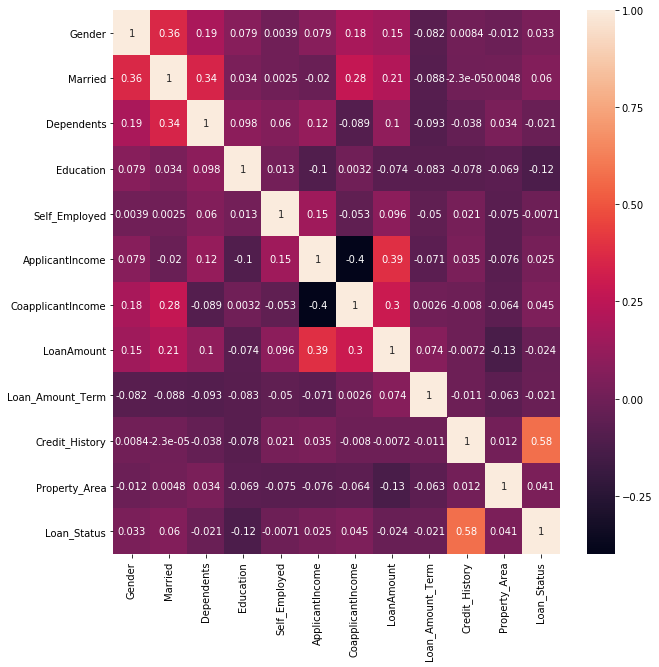

In [30]:
# check corrilation
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),annot=True)

In [31]:
x=df3.drop("Loan_Status",axis=1)
y=df3["Loan_Status"]

In [32]:

print(sklearn.__version__)

0.24.2


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [34]:
logi=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)

In [35]:
svm__=cross_val_score(SVC(),X=x,y=y,cv=5)

In [36]:
tree__=cross_val_score(DecisionTreeClassifier(),X=x,y=y,cv=5)

In [37]:
random=cross_val_score(RandomForestClassifier(),X=x,y=y,cv=5)

In [38]:
knn__=cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=5)

In [39]:
print("logistic regression  mean cross val score:",np.mean(logi))
print("Decesion tree mean cross val score:",np.mean(tree__))
print("Random forest mean cross val score:",np.mean(random))
print("SVM mean cross val score:",np.mean(svm__))
print("KNN mean cross val score:",np.mean(knn__))

logistic regression  mean cross val score: 0.8263366336633664
Decesion tree mean cross val score: 0.7545148514851485
Random forest mean cross val score: 0.8103564356435644
SVM mean cross val score: 0.6946138613861386
KNN mean cross val score: 0.6147326732673268


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [41]:
param_grid_={
    'n_estimators':[15,18,25,27],
    'max_features':['sqrt','log2','None'],
    'max_depth':[10,11,12,13],
    'max_leaf_nodes':[10,11,12,12]
}

In [42]:
from sklearn.model_selection import GridSearchCV
g_model=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_,cv=5)

In [43]:
g_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [10, 11, 12, 12],
                         'n_estimators': [15, 18, 25, 27]})

In [44]:
print(g_model.best_params_)

{'max_depth': 13, 'max_features': 'log2', 'max_leaf_nodes': 12, 'n_estimators': 25}


In [45]:
model=RandomForestClassifier(max_depth=11,max_features='log2',max_leaf_nodes=12,n_estimators=15)

In [46]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, max_features='log2', max_leaf_nodes=12,
                       n_estimators=15)

In [47]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [48]:
acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

0.801980198019802


In [49]:
con_m=confusion_matrix(y_test,y_pred)
print(con_m)

[[11 18]
 [ 2 70]]


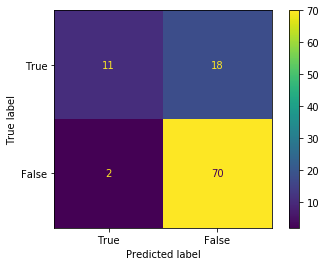

In [50]:
mat=ConfusionMatrixDisplay(confusion_matrix=con_m,display_labels=['True','False'])
mat.plot()
plt.show()

In [51]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
599,1,1,2,0,0,5780,0.0,192.000000,360.0,1.0,2
192,1,1,0,1,0,6033,0.0,160.000000,360.0,1.0,2
322,1,1,2,1,0,3601,1590.0,146.412162,360.0,1.0,0
215,1,1,3,1,0,3850,983.0,100.000000,360.0,1.0,1
297,0,1,1,0,0,4666,0.0,135.000000,360.0,1.0,2


In [52]:
def loan_app_predict(a,b,c,d,e,f,g,h,i,j,k):
    y=model.predict([[a,b,c,d,e,f,g,h,i,j,k]])
    if y==1:
        a="Loan approved"
    else:
        a="Loan not approved"
    return print(a)


In [53]:
# loan_app_predict(1,1,2,0,0,5780,0.0,192.000000,360.0,1.0,2)
loan_app_predict(0,0,0,0,1,4583,0.0,128.000000,360.0,0.0,1)
# 0	0	0	0	1	4583	0.0	133.000000	360.0	0.0	1	


Loan not approved
